In [22]:
import numpy as np

import matplotlib.pyplot as plt
from cycler import cycler
from coffea import hist, util

from ttgamma.utils.plotting import plotWithRatio, RebinHist, SetRangeHist

Load output files

In [23]:
nJets = 4

outputMC = util.load(f'Outputs/outputMCOther_ttgamma_condorFull_{nJets}jet.coffea')
outputMC.add(util.load(f'Outputs/outputMCSingleTop_ttgamma_condorFull_{nJets}jet.coffea'))
outputMC.add(util.load(f'Outputs/outputMCTTbar1l_ttgamma_condorFull_{nJets}jet.coffea'))
outputMC.add(util.load(f'Outputs/outputMCTTbar2l_ttgamma_condorFull_{nJets}jet.coffea'))
outputMC.add(util.load(f'Outputs/outputMCTTGamma_ttgamma_condorFull_{nJets}jet.coffea'))
outputMC.add(util.load(f'Outputs/outputMCWJets_ttgamma_condorFull_{nJets}jet.coffea'))
outputMC.add(util.load(f'Outputs/outputMCZJets_ttgamma_condorFull_{nJets}jet.coffea'))

outputData = util.load(f'Outputs/outputData_ttgamma_condorFull_{nJets}jet.coffea')

Set up groupings of samples.
Order of dictionary is used for determining plotting order

In [24]:
grouping= {'$t\overline{t}+\gamma$': ['TTGamma_Dilepton','TTGamma_SingleLept','TTGamma_Hadronic'],
            '$t\overline{t}$'  : ['TTbarPowheg_Dilepton', 'TTbarPowheg_Semilept', 'TTbarPowheg_Hadronic'],
            'Single top':['ST_s_channel', 'ST_tW_channel', 'ST_tbarW_channel', 'ST_tbar_channel', 'ST_t_channel'],
            'W+jets':['W1jets', 'W2jets', 'W3jets', 'W4jets'],
            'Z+jets'  : ['DYjetsM10to50', 'DYjetsM50'],
            'W+$\gamma$' : ['WGamma'],
            'Z+$\gamma$' : ['ZGamma'],
            'TTV'    : ['TTWtoLNu','TTWtoQQ','TTZtoLL'],
            'GJets'  : [ 'GJets_HT40To100', 'GJets_HT100To200', 'GJets_HT200To400', 'GJets_HT400To600', 'GJets_HT600ToInf'],
            'QCD'    :['QCD_Pt20to30_Ele', 'QCD_Pt30to50_Ele', 'QCD_Pt50to80_Ele', 'QCD_Pt80to120_Ele', 'QCD_Pt120to170_Ele', 'QCD_Pt170to300_Ele', 'QCD_Pt300toInf_Ele', 'QCD_Pt20to30_Mu', 'QCD_Pt30to50_Mu', 'QCD_Pt50to80_Mu', 'QCD_Pt80to120_Mu', 'QCD_Pt120to170_Mu', 'QCD_Pt170to300_Mu', 'QCD_Pt300to470_Mu', 'QCD_Pt470to600_Mu', 'QCD_Pt600to800_Mu', 'QCD_Pt800to1000_Mu', 'QCD_Pt1000toInf_Mu'],
  }

groupCategory= {"Genuine $\gamma$": slice(1,2),
                "MisID e":slice(2,3),
                "NonPrompt":slice(3,5),
               }


Plot the photon pt spectrum

/uscms/home/lhasa/nobackup/TTGamma_LongExercise/ttgenv/lib/python3.6/site-packages/coffea/hist/hist_tools.py:347: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7fc31d4a52b0>
  warnings.warn("Not all requested indices present in %r" % self, RuntimeWarning)


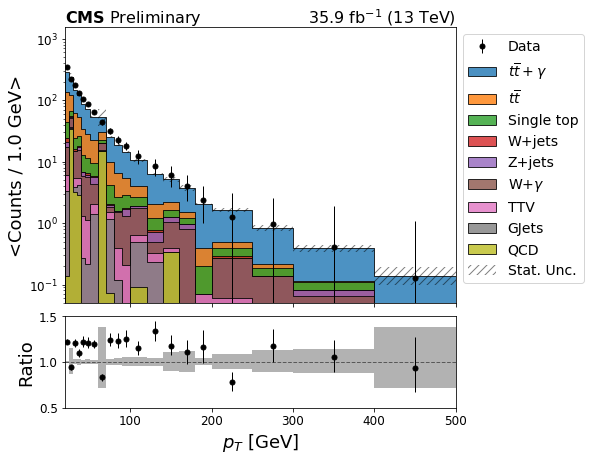

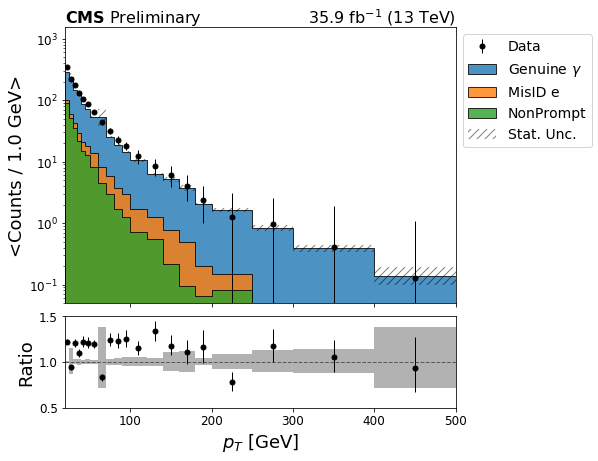

In [25]:
#Get photon pt distribution from coffea output
h = outputMC['photon_pt']

#sum over lepton flavors (get both electron and muon)
h = h.sum('lepFlavor')

#integrate over systematics, selecting only "nominal"
h = h.integrate('systematic','nominal')

#group the datasets into the sample types
h = h.group('dataset',hist.Cat(r'dataset',r'Samples',sorting='placement'),grouping)

#group the photon category axis into the category types listed above
h = h.group('category',hist.Cat(r'category',r'Category',sorting='placement'),groupCategory)

#rebin the pt axis
h = h.rebin("pt",hist.Bin("pt",h.axis("pt").label,np.array([20,25,30,35,40,45,50,60,70,80,90,100,120,140,160,180,200,250,300,400,500])))

hData = outputData['photon_pt'].sum('lepFlavor').sum('systematic').sum('dataset').sum('category')
hData = hData.rebin("pt",hist.Bin("pt",h.axis("pt").label,np.array([20,25,30,35,40,45,50,60,70,80,90,100,120,140,160,180,200,250,300,400,500])))

plotWithRatio(h.sum('category'), hData, overlay='dataset', invertStack=True, binwnorm=1., xRange=[20,500], yRange=[5e-2,None], logY=True,leg='right')
plotWithRatio(h.sum('dataset'), hData, overlay='category', invertStack=True, binwnorm=1., xRange=[20,500], yRange=[5e-2,None], logY=True,leg='right')


In [15]:
outputMC['photon_lepton_mass_3j0t'].identifiers('dataset') 

[<StringBin (DYjetsM10to50) instance at 0x7fc31da4f8d0>,
 <StringBin (DYjetsM50) instance at 0x7fc31da4f9b0>,
 <StringBin (GJets_HT100To200) instance at 0x7fc31d9618d0>,
 <StringBin (QCD_Pt1000toInf_Mu) instance at 0x7fc31d961898>,
 <StringBin (QCD_Pt120to170_Ele) instance at 0x7fc31d961860>,
 <StringBin (QCD_Pt120to170_Mu) instance at 0x7fc31d961828>,
 <StringBin (QCD_Pt170to300_Ele) instance at 0x7fc31d9617f0>,
 <StringBin (QCD_Pt170to300_Mu) instance at 0x7fc31d9617b8>,
 <StringBin (QCD_Pt20to30_Ele) instance at 0x7fc31d961780>,
 <StringBin (QCD_Pt20to30_Mu) instance at 0x7fc31d961748>,
 <StringBin (QCD_Pt300to470_Mu) instance at 0x7fc31d961710>,
 <StringBin (QCD_Pt300toInf_Ele) instance at 0x7fc31d9616d8>,
 <StringBin (QCD_Pt30to50_Ele) instance at 0x7fc31d9616a0>,
 <StringBin (QCD_Pt30to50_Mu) instance at 0x7fc31d961668>,
 <StringBin (QCD_Pt470to600_Mu) instance at 0x7fc31d961630>,
 <StringBin (QCD_Pt50to80_Ele) instance at 0x7fc31d9615f8>,
 <StringBin (QCD_Pt50to80_Mu) instance a

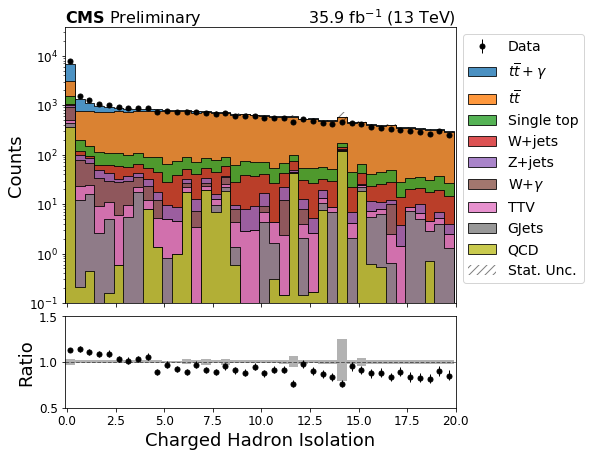

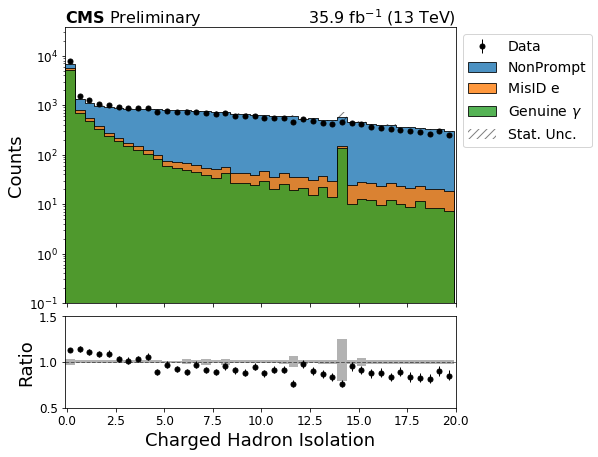

In [26]:
h = outputMC['photon_chIso'].sum('lepFlavor').integrate('systematic','nominal')
h = h.group('dataset',hist.Cat(r'dataset',r'Samples',sorting='placement'),grouping)
h = h.group('category',hist.Cat(r'category',r'Category',sorting='placement'),groupCategory)
h = RebinHist(h,'chIso',10)
hData = outputData['photon_chIso'].sum('lepFlavor').sum('systematic').sum('dataset').sum('category')
hData = RebinHist(hData,'chIso',10)

plotWithRatio(h.sum('category'), hData, overlay='dataset', invertStack=True, xRange=[-.1,20], yRange=[1e-1,None], logY=True,leg='right')
plotWithRatio(h.sum('dataset'), hData, overlay='category', invertStack=False, xRange=[-.1,20], yRange=[1e-1,None], logY=True,leg='right')


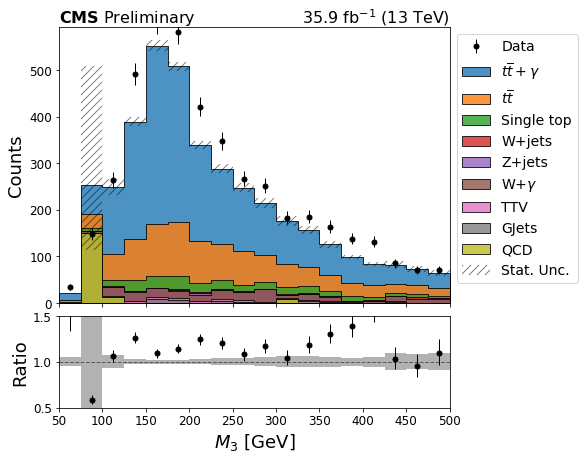

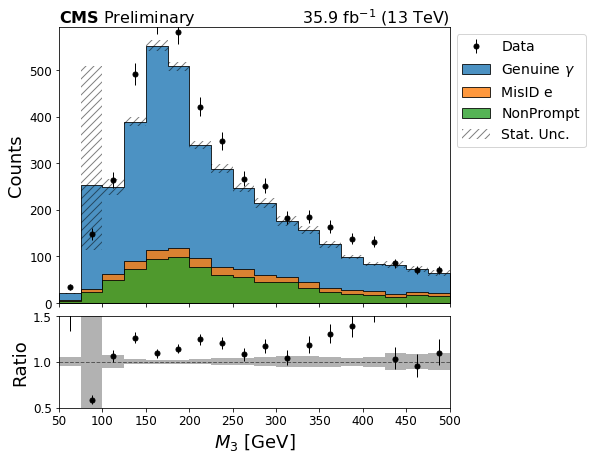

In [27]:
h = outputMC['M3'].integrate('lepFlavor','muon').integrate('systematic','nominal')
h = h.group('dataset',hist.Cat(r'dataset',r'Samples',sorting='placement'),grouping)
h = h.group('category',hist.Cat(r'category',r'Category',sorting='placement'),groupCategory)
h = RebinHist(h,"M3",5)
h = SetRangeHist(h,"M3",50,500)

hData = outputData['M3'].integrate('lepFlavor','muon').sum('systematic').sum('dataset').sum('category')
hData = RebinHist(hData,"M3",5)
hData = SetRangeHist(hData,"M3",50,500)

plotWithRatio(h.sum('category'), hData, overlay='dataset', invertStack=True, leg='right')#, yRange=[1e-1,None], logY=True)
plotWithRatio(h.sum('dataset'), hData, overlay='category', invertStack=True, leg='right')#, yRange=[1e-1,None], logY=True)


In [28]:
h = outputMC['M3Presel'].sum('lepFlavor').integrate('systematic','nominal')
h = h.group('dataset',hist.Cat(r'dataset',r'Samples',sorting='placement'),grouping)
h = RebinHist(h,"M3",5)
h = SetRangeHist(h,"M3",50,550)

hData = outputData['M3Presel'].sum('lepFlavor').sum('systematic').sum('dataset')
hData = RebinHist(hData,"M3",5)
hData = SetRangeHist(hData,"M3",50,550)

plotWithRatio(h, hData, overlay='dataset', invertStack=True, xRange=[50,550], leg='right')#, yRange=[1e-1,None], logY=True)



KeyError: 'M3Presel'

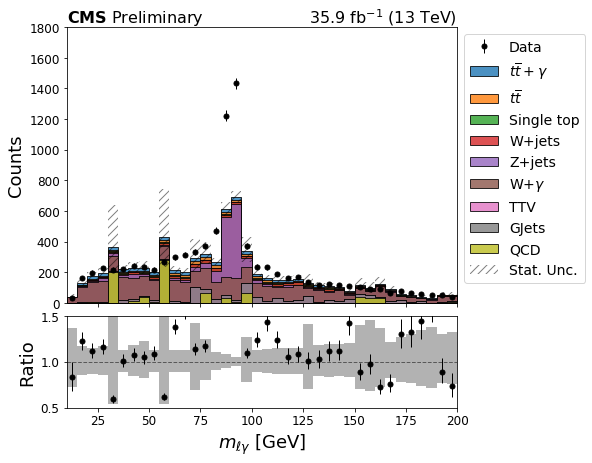

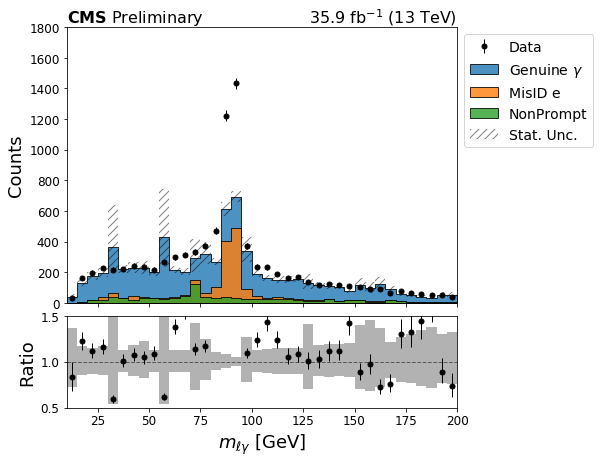

In [29]:
h = outputMC['photon_lepton_mass_3j0t'].integrate('lepFlavor','electron').integrate('systematic','nominal')
h = h.group('dataset',hist.Cat(r'dataset',r'Samples',sorting='placement'),grouping)
h = h.group('category',hist.Cat(r'category',r'Category',sorting='placement'),groupCategory)
#h = h.rebin("mass",5).setRange("mass",10,200)
h = RebinHist(h,"mass",5)
h = SetRangeHist(h,"mass",10,200)

hData = outputData['photon_lepton_mass_3j0t'].integrate('lepFlavor','electron').sum('systematic').sum('dataset').sum('category')
#hData = hData.rebin("mass",5).setRange("mass",10,200)
hData = RebinHist(hData,"mass",5)
hData = SetRangeHist(hData,"mass",10,200)

plotWithRatio(h.sum('category'), hData, overlay='dataset', invertStack=True, yRange=[0,1800], leg='right')
plotWithRatio(h.sum('dataset'), hData, overlay='category', invertStack=True, yRange=[0,1800], leg='right')
